In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

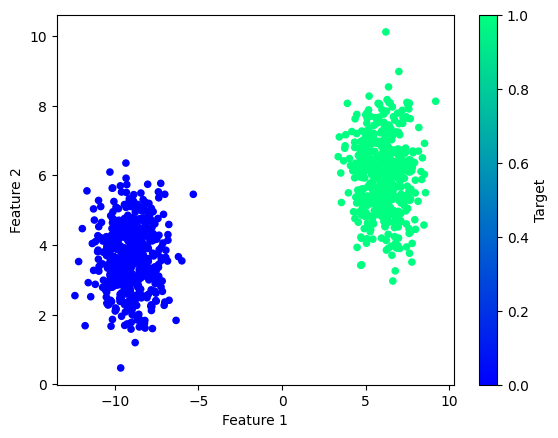

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

2023-01-30 15:37:42.783461: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add out first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

2023-01-30 15:37:42.902082: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7049 - accuracy: 0.0587
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.1707
Epoch 3/100
24/24 [==============================] - 0s 980us/step - loss: 0.6920 - accuracy: 0.8547
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 934us/step - loss: 0.6795 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 875us/step - loss: 0.6613 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 946us/step - loss: 0.6498 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 742us/step - loss: 0.6368 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 947us/step - loss: 0.6224 - accuracy: 1.00

Epoch 82/100
24/24 [==============================] - 0s 926us/step - loss: 0.1001 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 803us/step - loss: 0.0985 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 930us/step - loss: 0.0968 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 886us/step - loss: 0.0952 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 944us/step - loss: 0.0937 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 760us/step - loss: 0.0921 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 828us/step - loss: 0.0906 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 854us/step - loss: 0.0892 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 995us/step - loss: 0.0877 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 819us/step - loss: 0.0863

<AxesSubplot:>

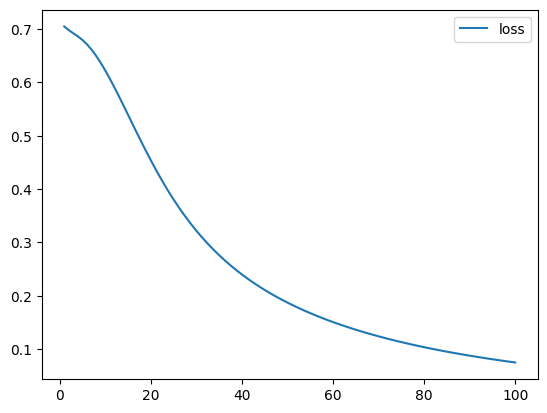

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

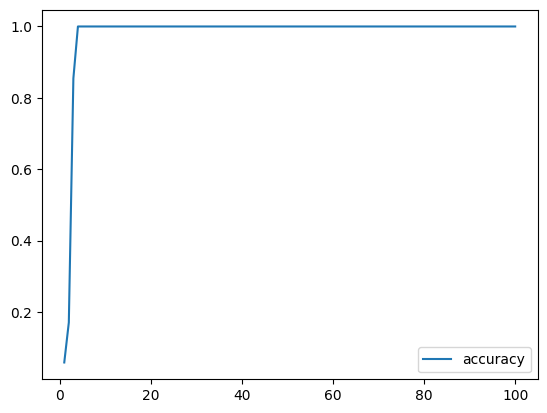

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0702 - accuracy: 1.0000
Loss: 0.07019929587841034, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled)>0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [15]:
# Predict the classification of a new set of blob data
new_X, new_y = make_blobs (n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

nn_model.predict_classes(new_X_scaled)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

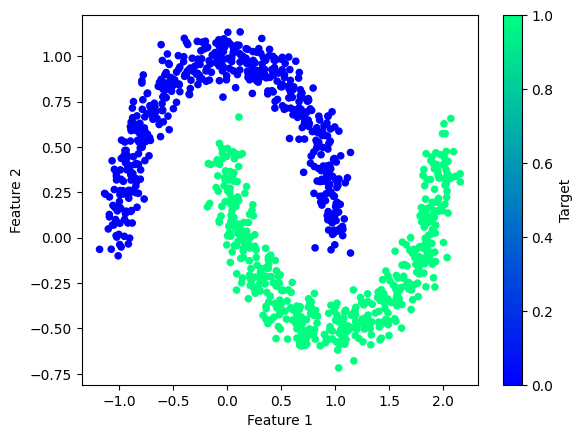

In [18]:
# Generate dummy data using Scikit-learn's make_moons method & visualize using Pandas and Matplotlib
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y-moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9457 - accuracy: 0.5227
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8548 - accuracy: 0.5413
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7939 - accuracy: 0.5613
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7519 - accuracy: 0.5733
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7210 - accuracy: 0.5880
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5960
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.6067
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.6120
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6173
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6240
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.3117 - accuracy: 0.8573
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3098 - accuracy: 0.8587
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8627
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8640
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8653
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8653
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8653
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8653
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.8680
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8680
Epoch 93/100


<AxesSubplot:>

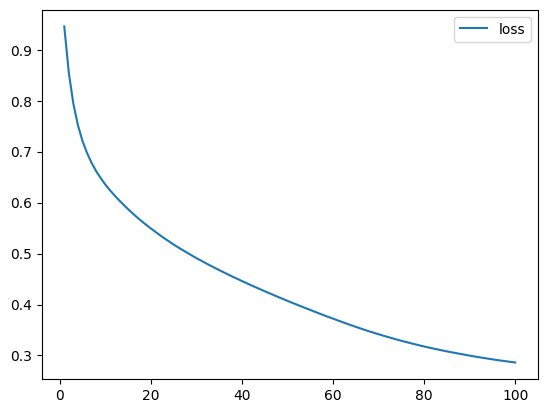

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))
                          
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

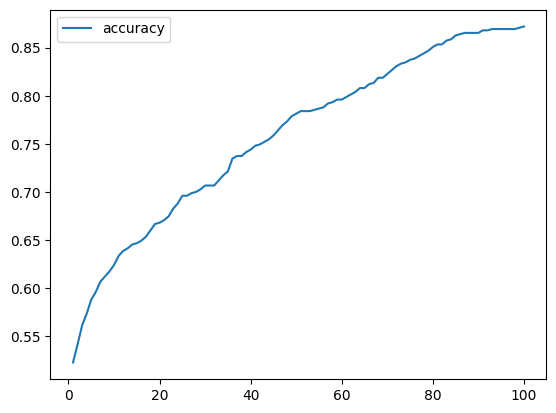

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [25]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [26]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [27]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 976us/step - loss: 0.6044 - accuracy: 0.6053
Epoch 2/100
24/24 [==============================] - 0s 952us/step - loss: 0.5710 - accuracy: 0.5973
Epoch 3/100
24/24 [==============================] - 0s 880us/step - loss: 0.5430 - accuracy: 0.6253
Epoch 4/100
24/24 [==============================] - 0s 903us/step - loss: 0.5189 - accuracy: 0.6440
Epoch 5/100
24/24 [==============================] - 0s 901us/step - loss: 0.4975 - accuracy: 0.8000
Epoch 6/100
24/24 [==============================] - 0s 812us/step - loss: 0.4788 - accuracy: 0.8373
Epoch 7/100
24/24 [==============================] - 0s 876us/step - loss: 0.4623 - accuracy: 0.8453
Epoch 8/100
24/24 [==============================] - 0s 895us/step - loss: 0.4473 - accuracy: 0.8507
Epoch 9/100
24/24 [==============================] - 0s 923us/step - loss: 0.4338 - accuracy: 0.8533
Epoch 10/100
24/24 [==============================] - 0s 800us/step - loss: 0.4212 - accura

24/24 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9187
Epoch 82/100
24/24 [==============================] - 0s 827us/step - loss: 0.2172 - accuracy: 0.9187
Epoch 83/100
24/24 [==============================] - 0s 840us/step - loss: 0.2160 - accuracy: 0.9187
Epoch 84/100
24/24 [==============================] - 0s 772us/step - loss: 0.2148 - accuracy: 0.9187
Epoch 85/100
24/24 [==============================] - 0s 888us/step - loss: 0.2136 - accuracy: 0.9200
Epoch 86/100
24/24 [==============================] - 0s 873us/step - loss: 0.2124 - accuracy: 0.9187
Epoch 87/100
24/24 [==============================] - 0s 824us/step - loss: 0.2110 - accuracy: 0.9200
Epoch 88/100
24/24 [==============================] - 0s 995us/step - loss: 0.2098 - accuracy: 0.9200
Epoch 89/100
24/24 [==============================] - 0s 802us/step - loss: 0.2085 - accuracy: 0.9200
Epoch 90/100
24/24 [==============================] - 0s 880us/step - loss: 0.2072 - accuracy: 0.